<a href="https://colab.research.google.com/github/mrcryptsie/Heart_Disease_Predictions/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task  : Heart Disease Prediction**

**Use a dataset containing medical data of
patients to predict if a person has heart
disease or not**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

**DATA COMPREHENSION**

In [ ]:
# Voir le datasets
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
# prompt: Vérifier s'il y a des valeurs manqantes dans les colonne du dataframe X

X.isnull().values.any()


True

In [ ]:
# prompt: Voir le nombre de valeurs manquantes par colonnes

X.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [ ]:
# prompt: Remplacer les valeurs manquantes par le nécessaire

X = X.fillna(X.mean())


In [ ]:
# prompt: Vérification à nouveau si les valeurs manquantes existe

X.isnull().values.any()


False

In [ ]:
# prompt: Voir le tableau de statistiques descriptives

X.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


**EDA**

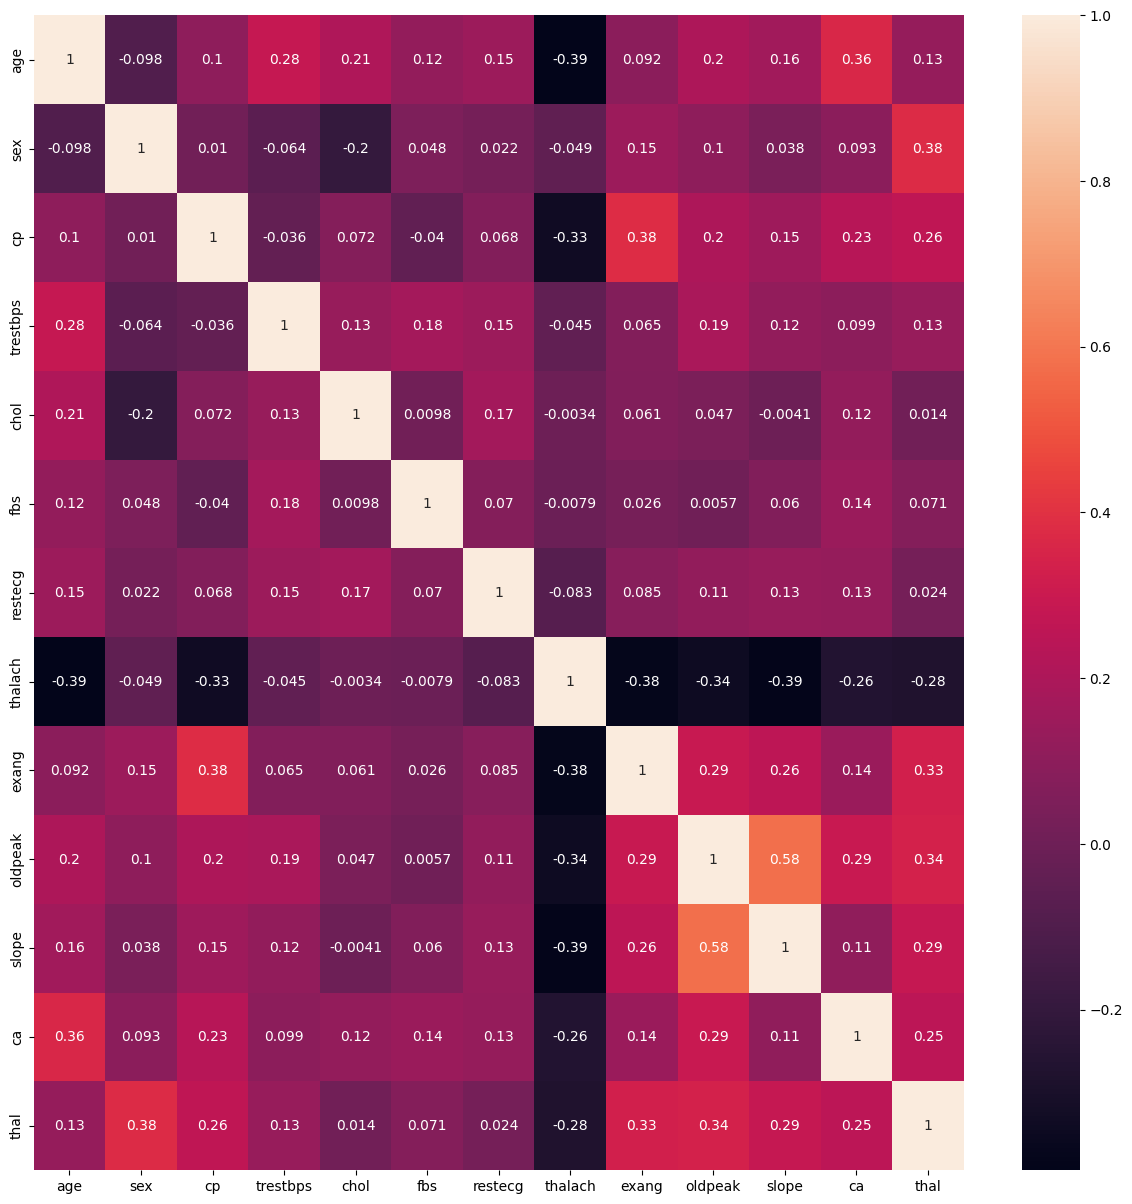

In [ ]:
# Voir la matrice de corrélation
import matplotlib.pyplot as plt
import seaborn as sns
X_corr = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(X_corr, annot=True)
plt.show()

**SCATTER PLOT**

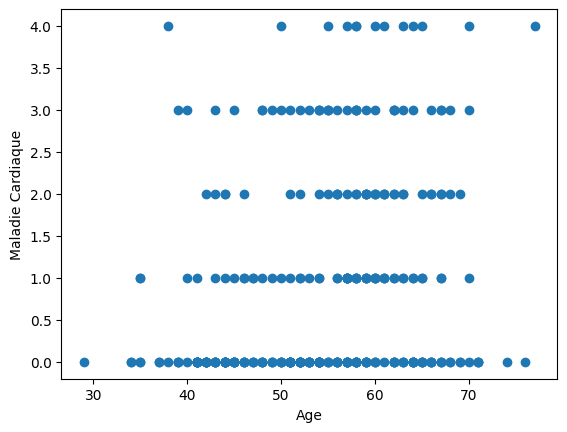

In [ ]:
# Age
plt.scatter(X['age'], y)
plt.xlabel('Age')
plt.ylabel('Maladie Cardiaque')
plt.show()

De cette graphique précédente, il ressort que l'age n'a vraiment pas assez d'impact sur le fait d'être atteint d'une maladie d'arrêt cardiaque ou pas

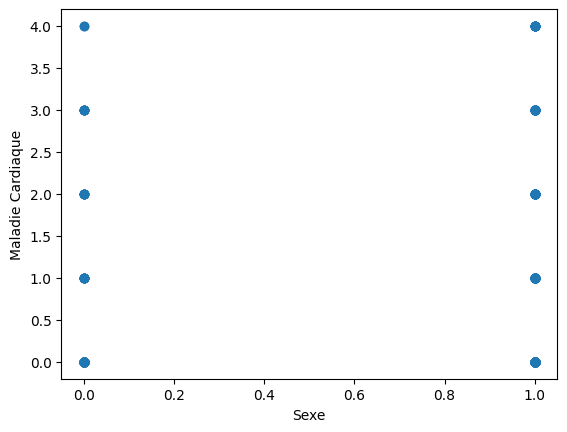

In [ ]:
# Sex
plt.scatter(X['sex'], y)
plt.xlabel('Sexe')
plt.ylabel('Maladie Cardiaque')
plt.show()

In [ ]:
# Voir les colonnes en entier
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

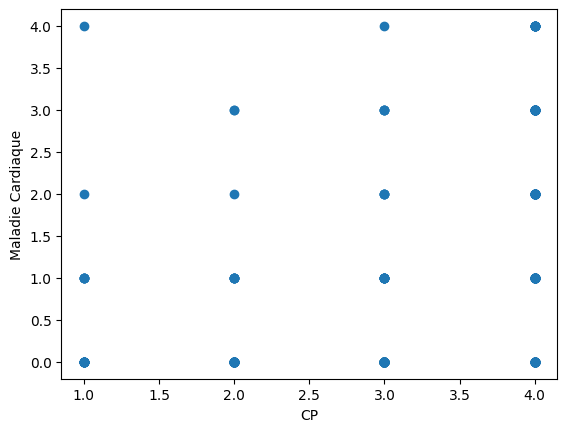

In [ ]:
# CP
plt.scatter(X['cp'], y)
plt.xlabel("CP")
plt.ylabel("Maladie Cardiaque")
plt.show()

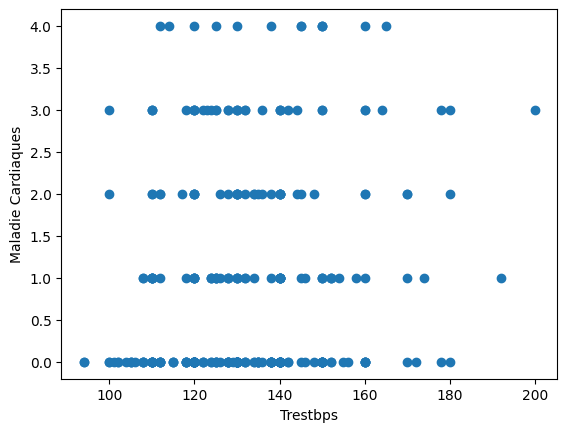

In [ ]:
# Trestbps
plt.scatter(X['trestbps'], y)
plt.xlabel('Trestbps')
plt.ylabel('Maladie Cardiaques')
plt.show()

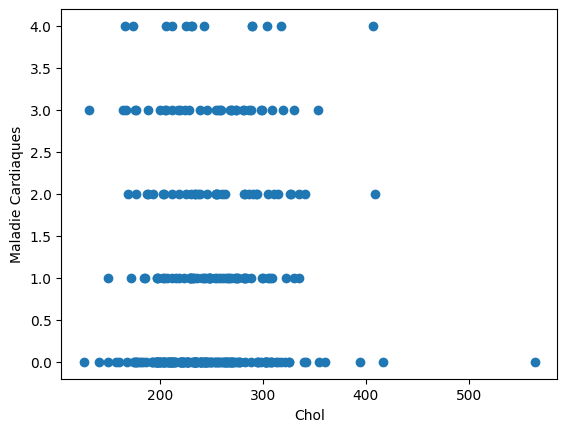

In [ ]:
# Chol
plt.scatter(X['chol'], y)
plt.xlabel('Chol')
plt.ylabel('Maladie Cardiaques')
plt.show()

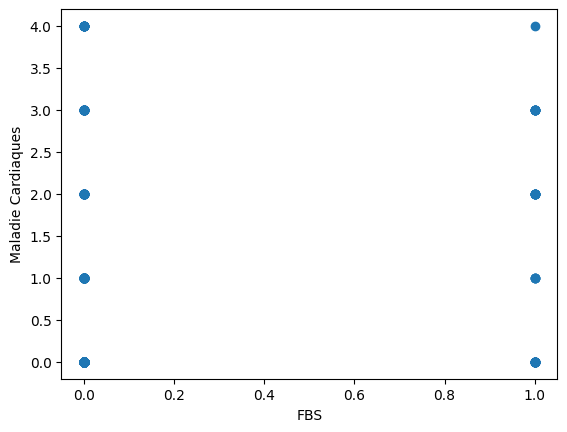

In [ ]:
# FBS
plt.scatter(X['fbs'], y)
plt.xlabel('FBS')
plt.ylabel('Maladie Cardiaques')
plt.show()

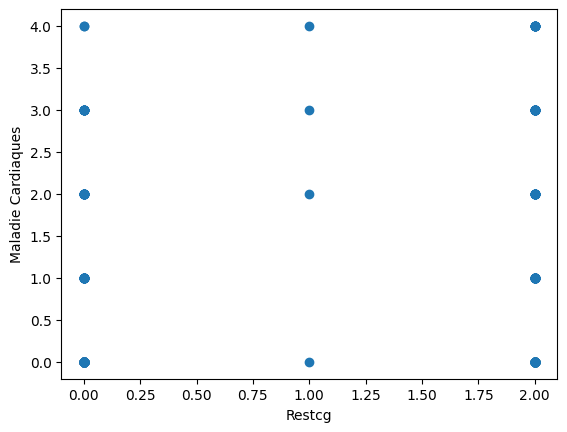

In [ ]:
# Restecg
plt.scatter(X['restecg'], y)
plt.xlabel('Restcg')
plt.ylabel('Maladie Cardiaques')
plt.show()

In [ ]:
# Voir les colonnes en entier
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

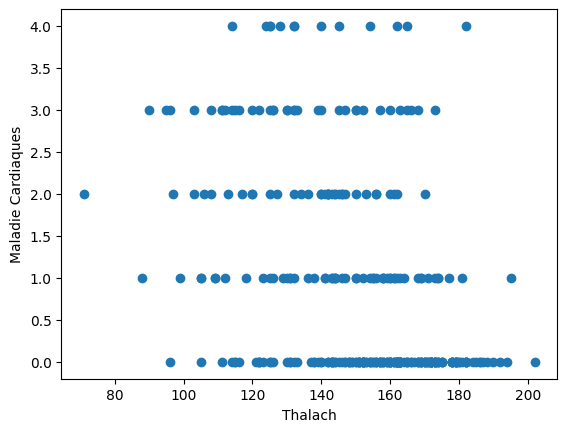

In [ ]:
# thalach
plt.scatter(X['thalach'], y)
plt.xlabel('Thalach')
plt.ylabel('Maladie Cardiaques')
plt.show()

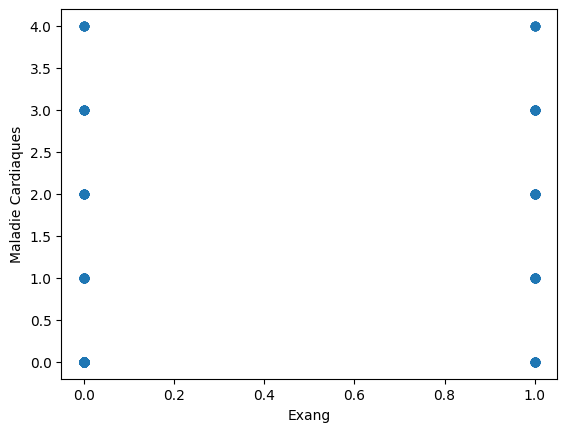

In [ ]:
# exang
plt.scatter(X['exang'], y)
plt.xlabel('Exang')
plt.ylabel('Maladie Cardiaques')
plt.show()

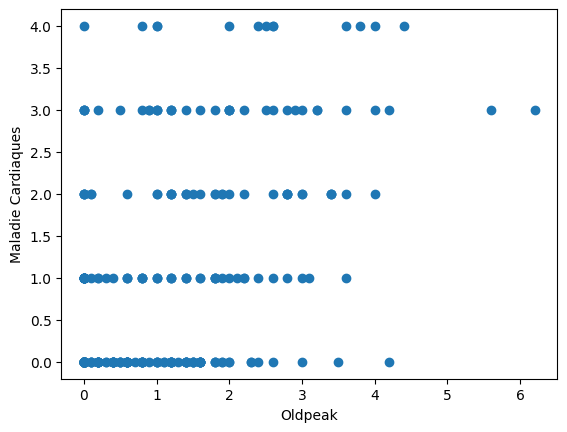

In [ ]:
# oldpeak
plt.scatter(X['oldpeak'], y)
plt.xlabel('Oldpeak')
plt.ylabel('Maladie Cardiaques')
plt.show()

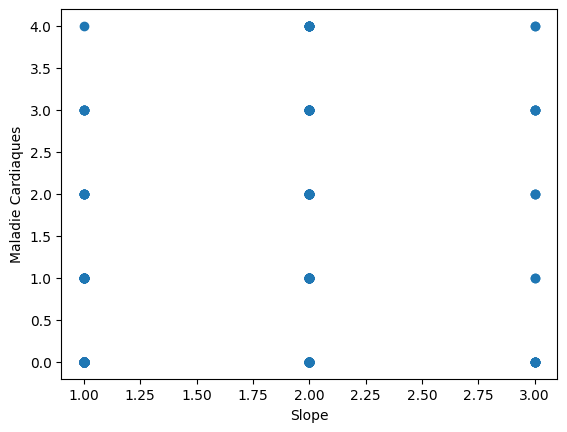

In [ ]:
# thalach
plt.scatter(X['slope'], y)
plt.xlabel('Slope')
plt.ylabel('Maladie Cardiaques')
plt.show()

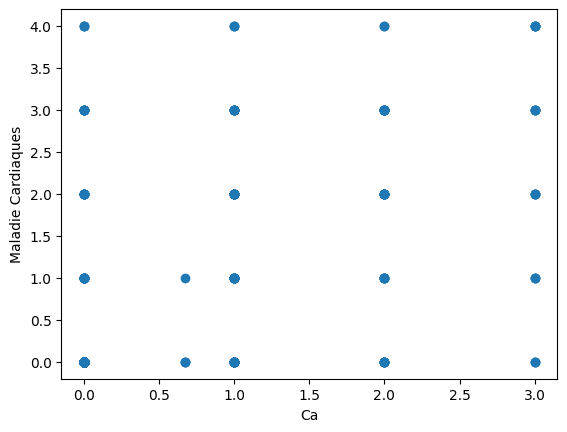

In [ ]:
# ca
plt.scatter(X['ca'], y)
plt.xlabel('Ca')
plt.ylabel('Maladie Cardiaques')
plt.show()

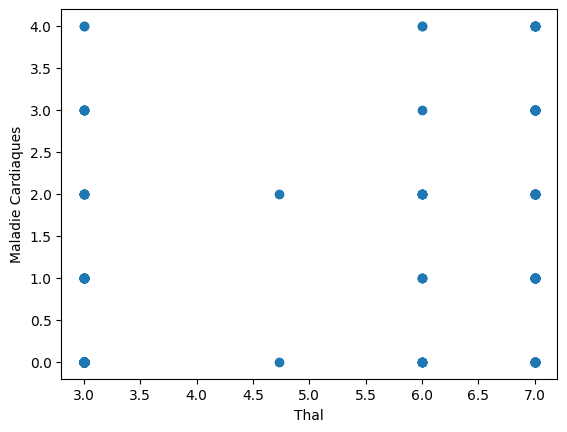

In [ ]:
#thal
plt.scatter(X['thal'], y)
plt.xlabel('Thal')
plt.ylabel('Maladie Cardiaques')
plt.show()

**BOX PLOT**

In [ ]:
# Voir les colonnes en entier
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

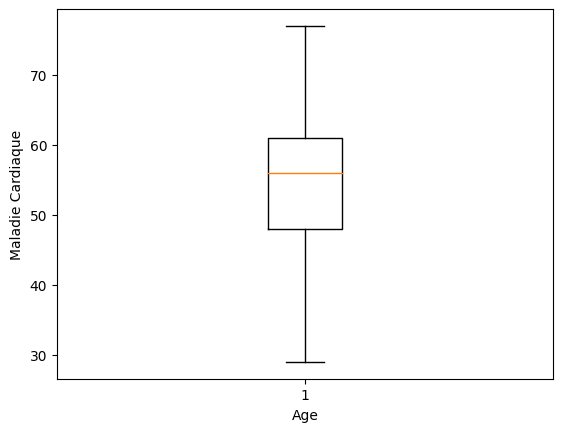

In [ ]:
# Age
plt.boxplot(X['age'])
plt.xlabel('Age')
plt.ylabel('Maladie Cardiaque')
plt.show()

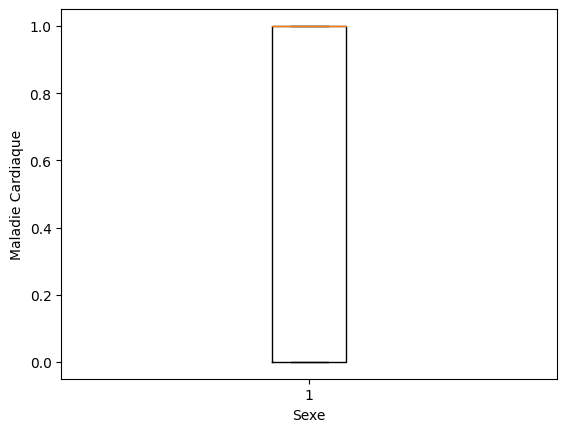

In [ ]:
# Sexe
plt.boxplot(X['sex'])
plt.xlabel('Sexe')
plt.ylabel('Maladie Cardiaque')
plt.show()

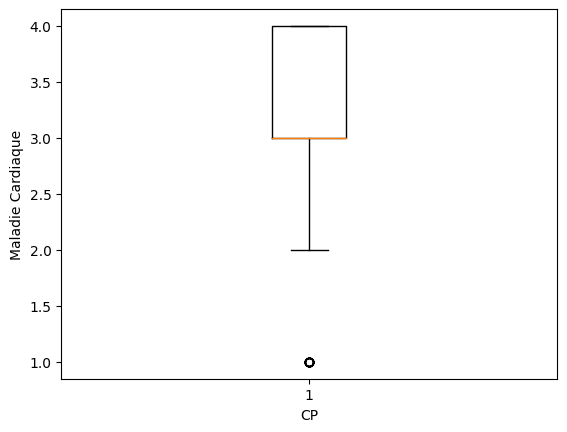

In [ ]:
# Cp
plt.boxplot(X['cp'])
plt.xlabel('CP')
plt.ylabel('Maladie Cardiaque')
plt.show()

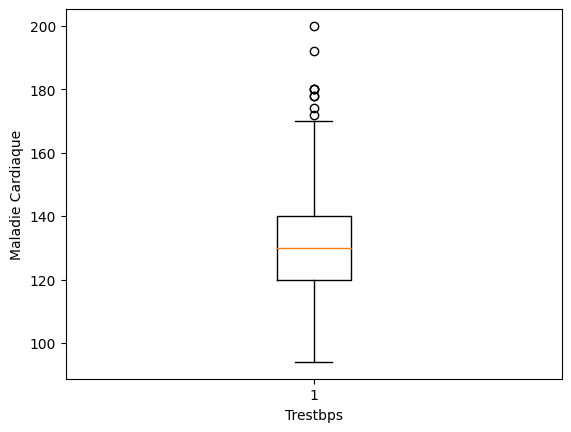

In [ ]:
# trestbps
plt.boxplot(X['trestbps'])
plt.xlabel('Trestbps')
plt.ylabel('Maladie Cardiaque')
plt.show()

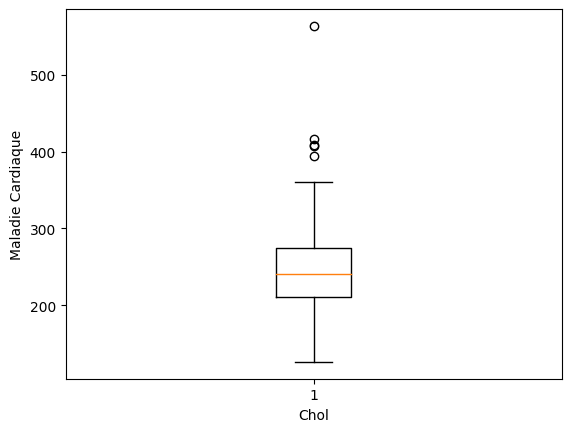

In [ ]:
# chol
plt.boxplot(X['chol'])
plt.xlabel('Chol')
plt.ylabel('Maladie Cardiaque')
plt.show()

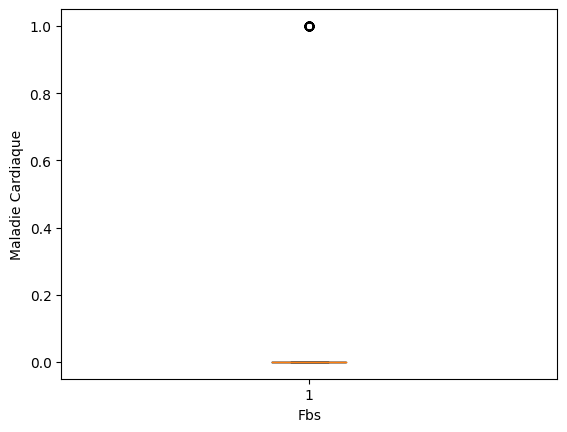

In [ ]:
# fbs
plt.boxplot(X['fbs'])
plt.xlabel('Fbs')
plt.ylabel('Maladie Cardiaque')
plt.show()

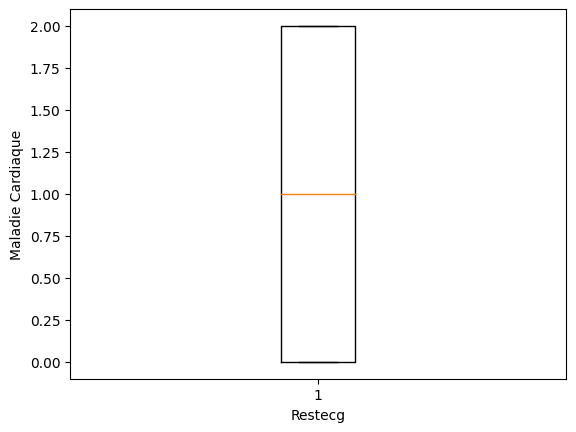

In [ ]:
# restecg
plt.boxplot(X['restecg'])
plt.xlabel('Restecg')
plt.ylabel('Maladie Cardiaque')
plt.show()

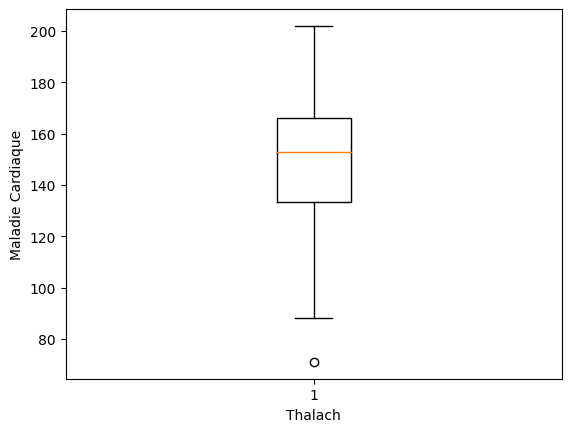

In [ ]:
# thalach
plt.boxplot(X['thalach'])
plt.xlabel('Thalach')
plt.ylabel('Maladie Cardiaque')
plt.show()

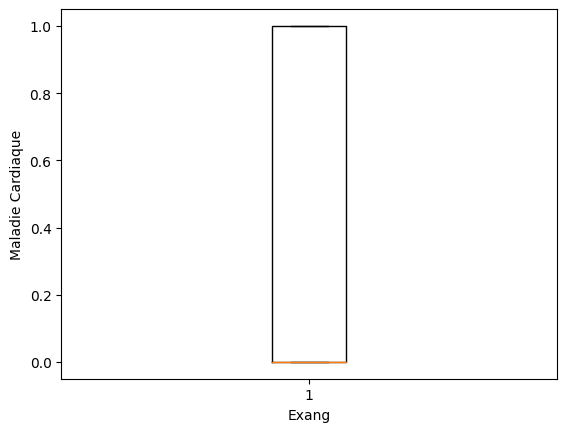

In [ ]:
# 'exang
plt.boxplot(X['exang'])
plt.xlabel('Exang')
plt.ylabel('Maladie Cardiaque')
plt.show()

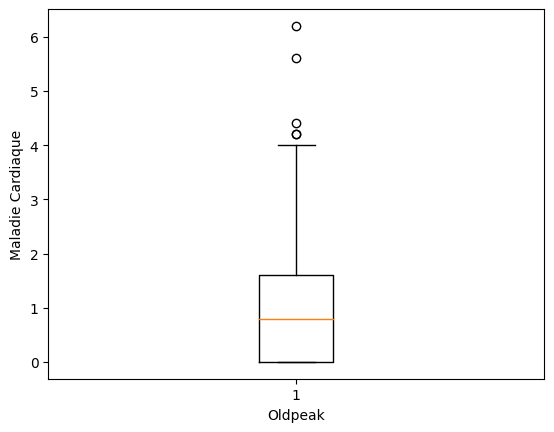

In [ ]:
# oldpeak
plt.boxplot(X['oldpeak'])
plt.xlabel('Oldpeak')
plt.ylabel('Maladie Cardiaque')
plt.show()

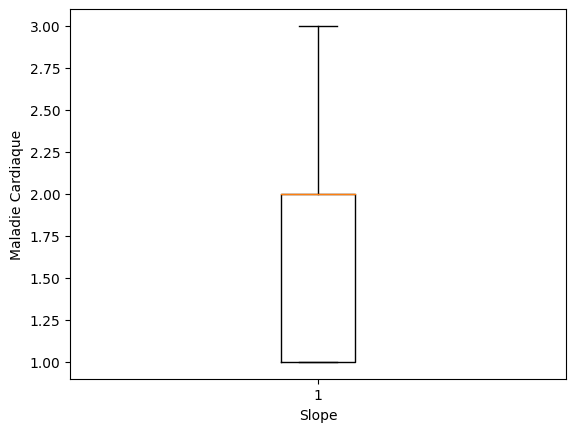

In [ ]:
# slope
plt.boxplot(X['slope'])
plt.xlabel('Slope')
plt.ylabel('Maladie Cardiaque')
plt.show()

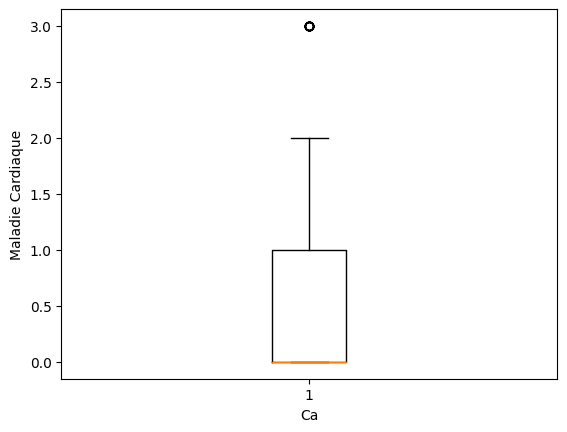

In [ ]:
# ca
plt.boxplot(X['ca'])
plt.xlabel('Ca')
plt.ylabel('Maladie Cardiaque')
plt.show()

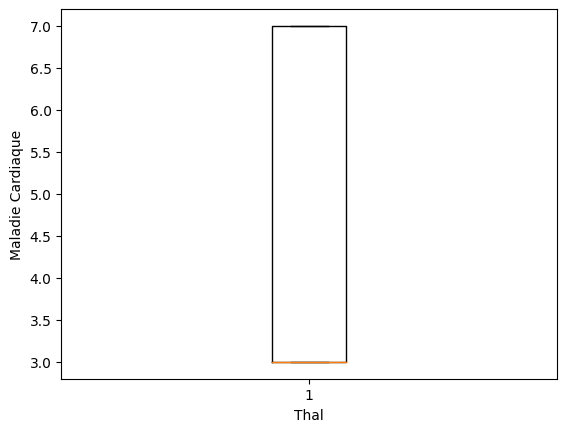

In [ ]:
# thal
plt.boxplot(X['thal'])
plt.xlabel('Thal')
plt.ylabel('Maladie Cardiaque')
plt.show()

**HISTOGRAMME**

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

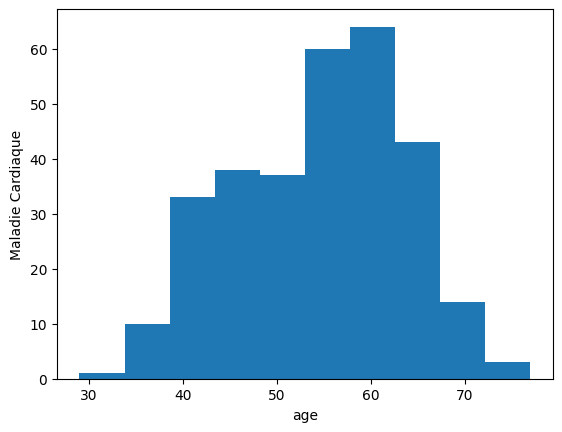

In [ ]:
# age
plt.hist(X['age'])
plt.xlabel('age')
plt.ylabel('Maladie Cardiaque')
plt.show()

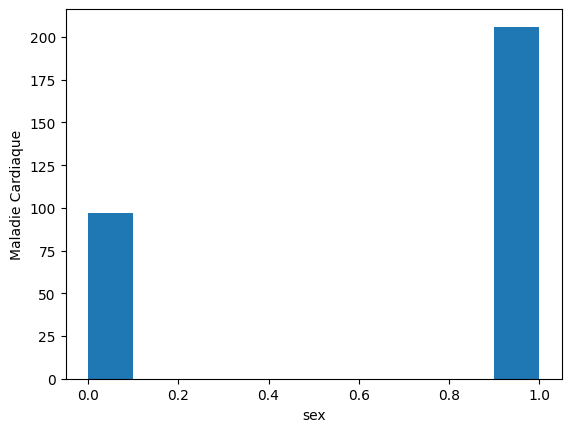

In [ ]:
#
plt.hist(X['sex'])
plt.xlabel('sex')
plt.ylabel('Maladie Cardiaque')
plt.show()

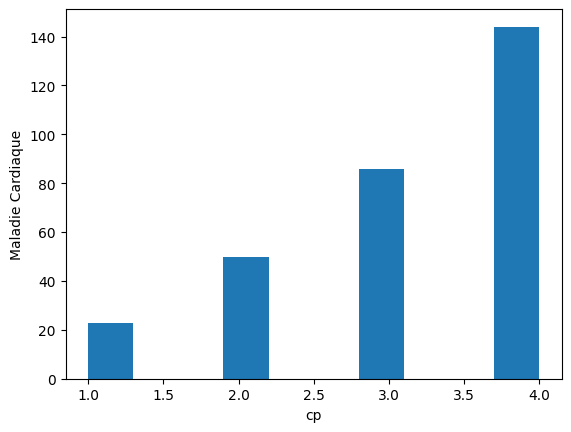

In [ ]:
# cp
plt.hist(X['cp'])
plt.xlabel('cp')
plt.ylabel('Maladie Cardiaque')
plt.show()

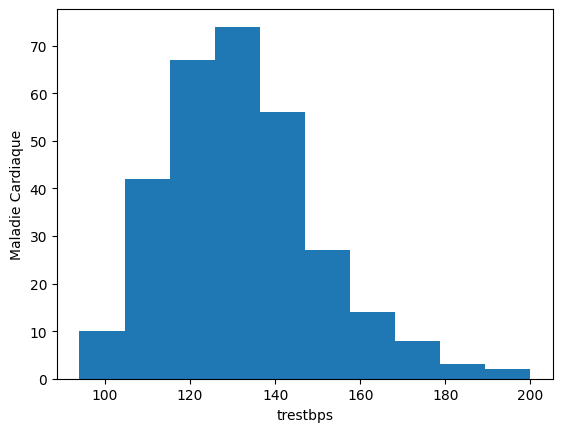

In [ ]:
# trestbps
plt.hist(X['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('Maladie Cardiaque')
plt.show()

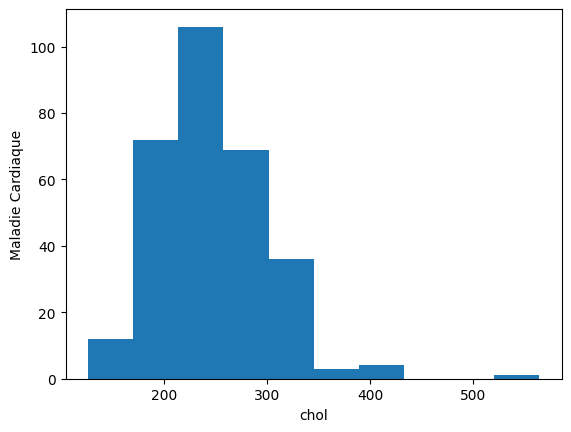

In [ ]:
# chol
plt.hist(X['chol'])
plt.xlabel('chol')
plt.ylabel('Maladie Cardiaque')
plt.show()

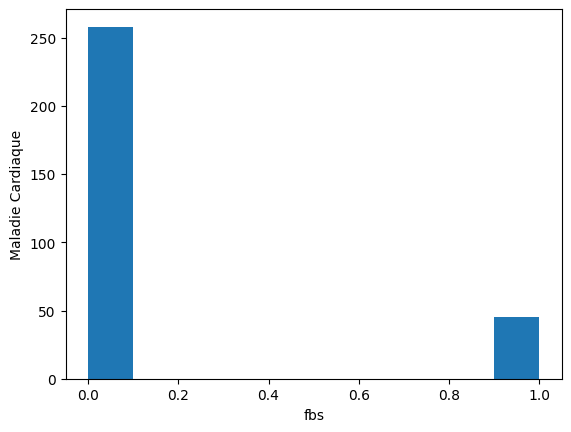

In [ ]:
# fbs
plt.hist(X['fbs'])
plt.xlabel('fbs')
plt.ylabel('Maladie Cardiaque')
plt.show()

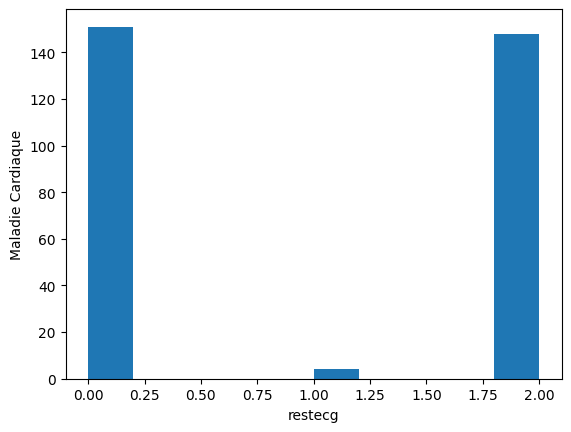

In [ ]:
# restecg
plt.hist(X['restecg'])
plt.xlabel('restecg')
plt.ylabel('Maladie Cardiaque')
plt.show()

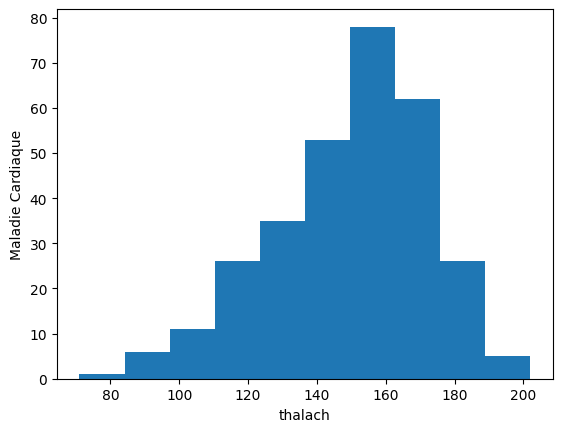

In [ ]:
# thalach
plt.hist(X['thalach'])
plt.xlabel('thalach')
plt.ylabel('Maladie Cardiaque')
plt.show()

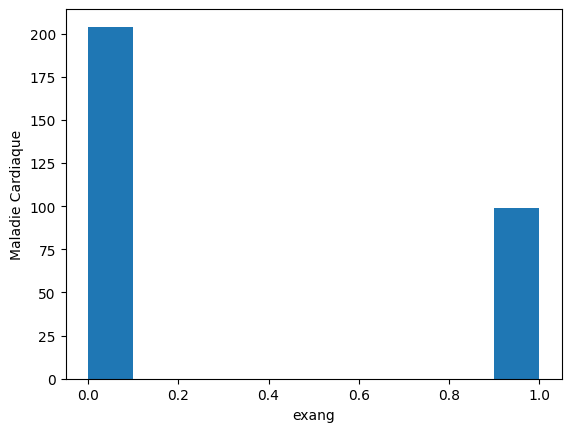

In [ ]:
# exang
plt.hist(X['exang'])
plt.xlabel('exang')
plt.ylabel('Maladie Cardiaque')
plt.show()

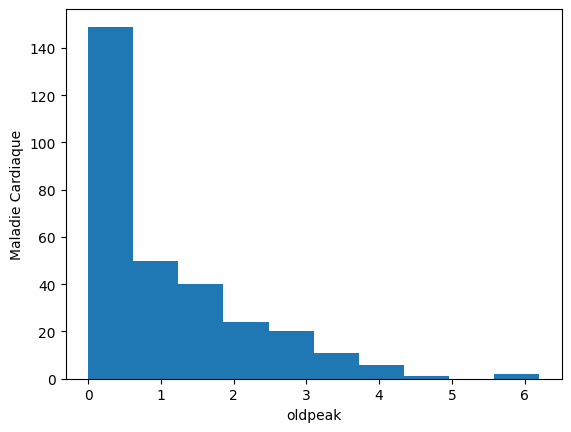

In [ ]:
# oldpeak
plt.hist(X['oldpeak'])
plt.xlabel('oldpeak')
plt.ylabel('Maladie Cardiaque')
plt.show()

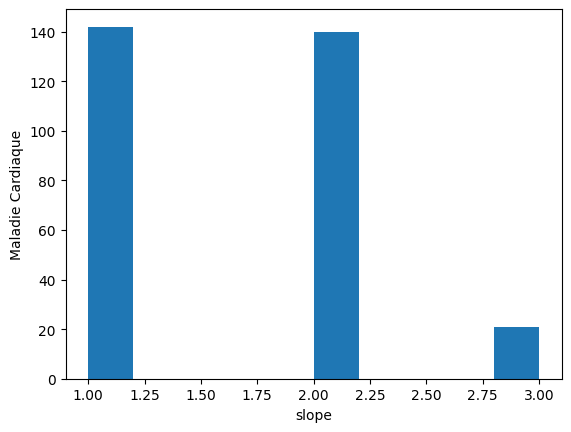

In [ ]:
# slope
plt.hist(X['slope'])
plt.xlabel('slope')
plt.ylabel('Maladie Cardiaque')
plt.show()

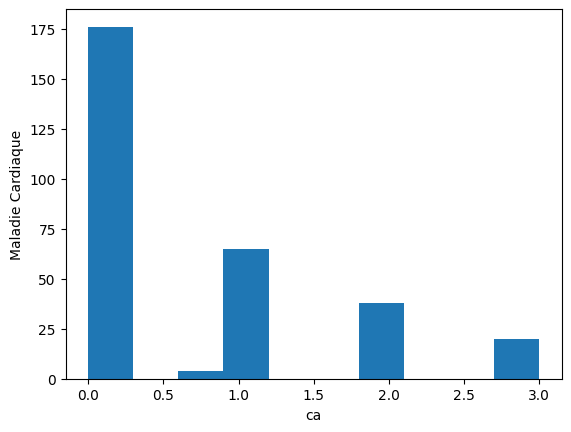

In [ ]:
# ca
plt.hist(X['ca'])
plt.xlabel('ca')
plt.ylabel('Maladie Cardiaque')
plt.show()

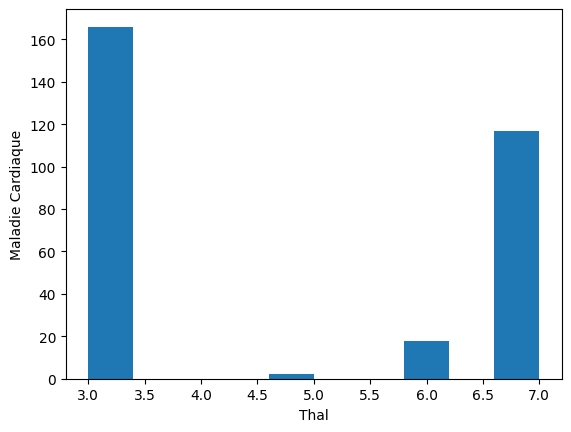

In [ ]:
# Thal
plt.hist(X['thal'])
plt.xlabel('Thal')
plt.ylabel('Maladie Cardiaque')
plt.show()

**DATA PRE-PROCESSING**

In [ ]:
# prompt: Voir s'il y a des colonnes dupliquées

X.columns.duplicated().any()


False

<Axes: xlabel='num'>

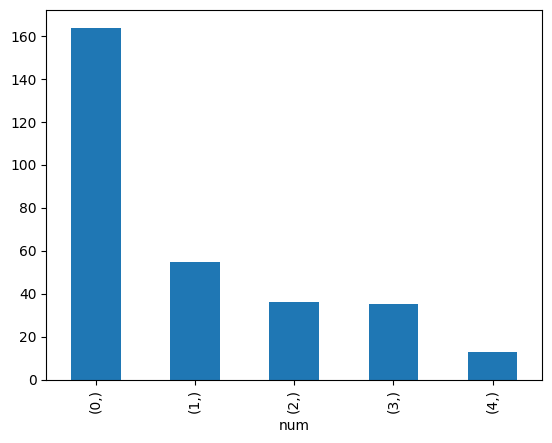

In [ ]:
#Voir si les classes de la colonnes target y sont équilibrés ou pas à l'aide d'un graphe

y.value_counts().plot.bar()


In [ ]:
# prompt: Créer le dataframe complet nommé df avec X et y
import pandas as pd
df = pd.concat([X, y], axis=1)
df.shape

(303, 14)

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


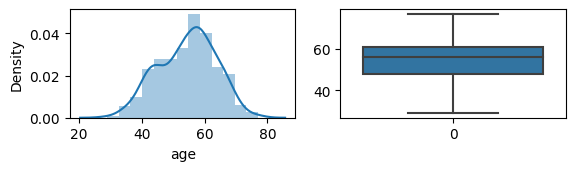

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


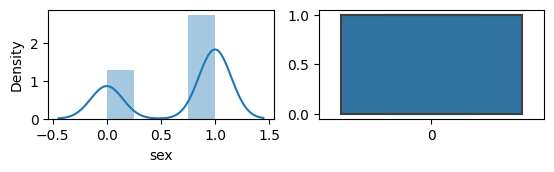

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


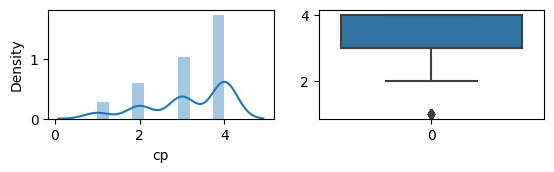

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


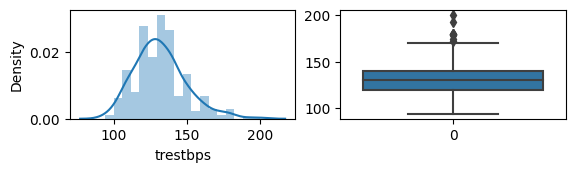

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


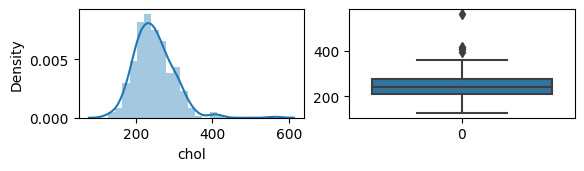

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


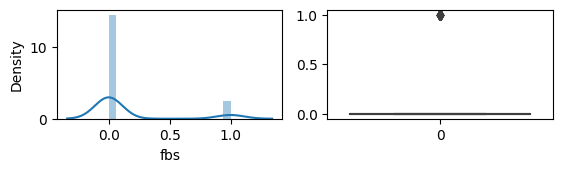

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


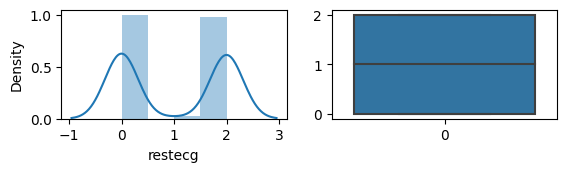

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


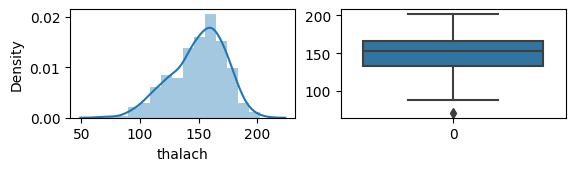

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


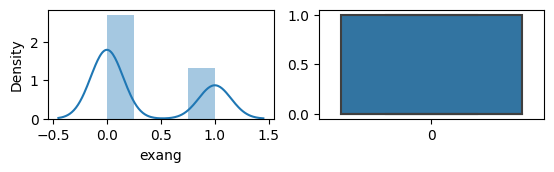

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


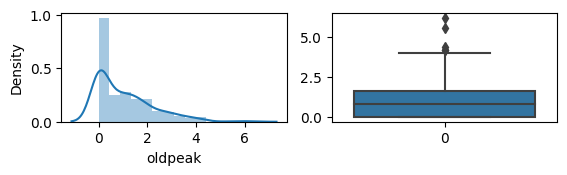

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


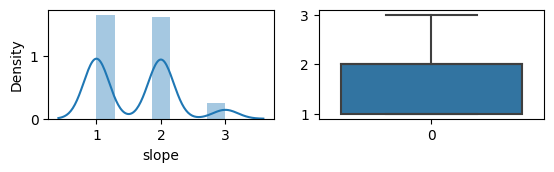

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


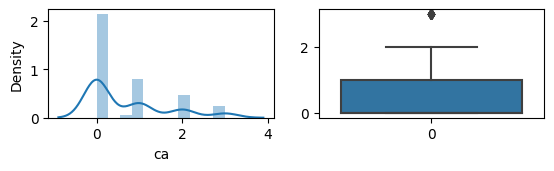

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


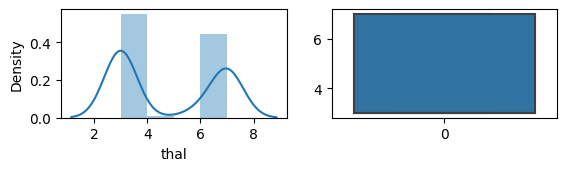

<ipython-input-330-b1255527d55e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


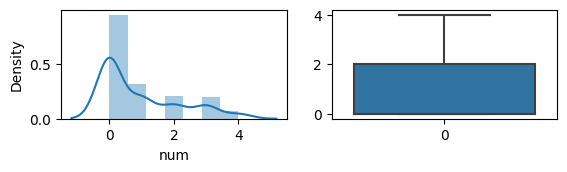

In [ ]:
# Distribution des variables quantitatives
for col in df:
  # Histogramme avec estimation de la densité de probabiité
  plt.subplot(321)
  sns.distplot(df[col])

  # Boîtes à moustaches
  plt.subplot(322)
  sns.boxplot(df[col])
  plt.show()

In [ ]:
num_cols = df.columns[df.dtypes != object]

In [ ]:
#définition d'une fonction de suppression de valeurs aberrantes
import numpy as np

def replace_outliers(data, numVar):
  Q1 = np.percentile(data[numVar], 25)
  Q3 = np.percentile(data[numVar], 75)
  IQR = Q3 - Q1
  min = Q1 - 1.5*IQR
  max = Q3 + 1.5*IQR
  #dataframeOut = dataframe.copy()
  data.loc[data[numVar] < min , numVar] = min
  data.loc[data[numVar] > max, numVar] = max

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


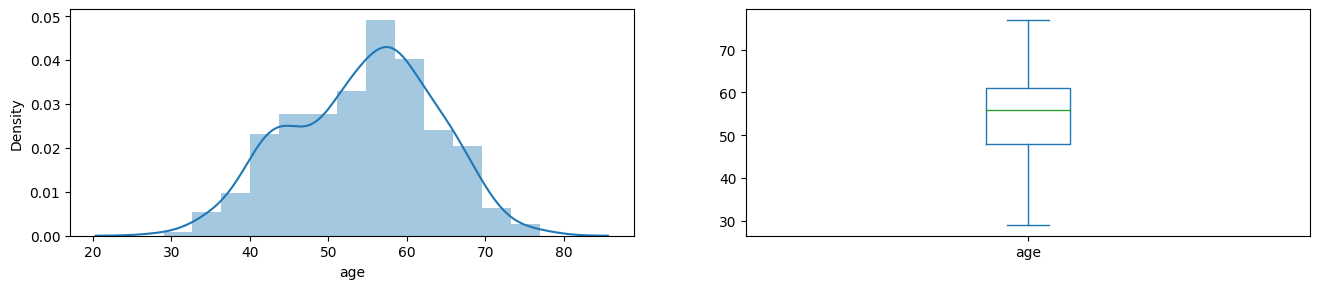

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


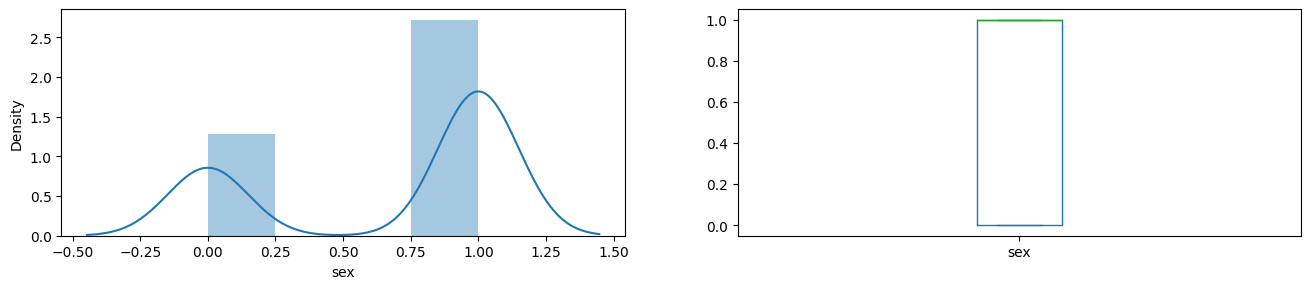

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


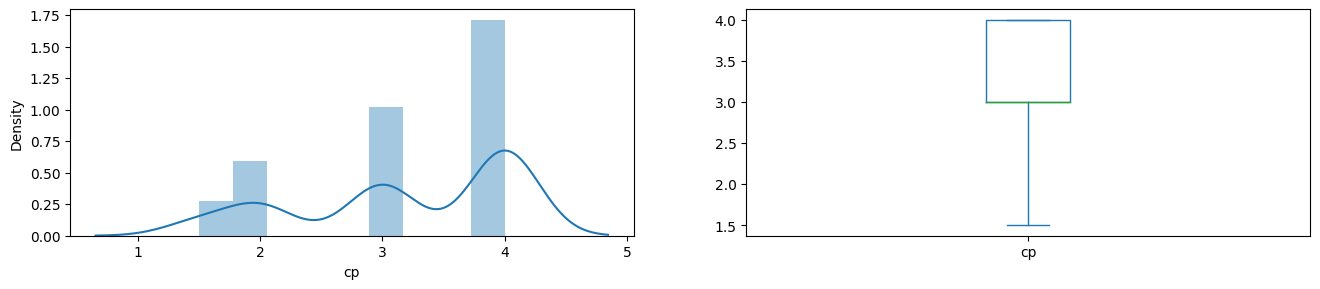

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


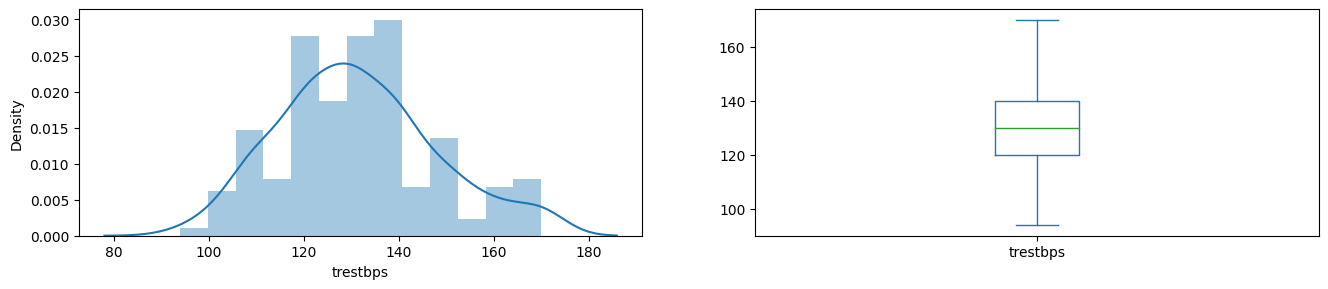

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


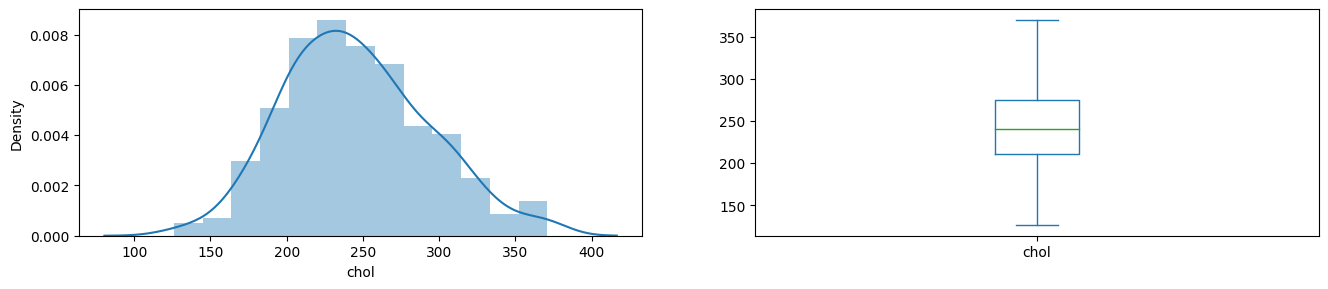

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


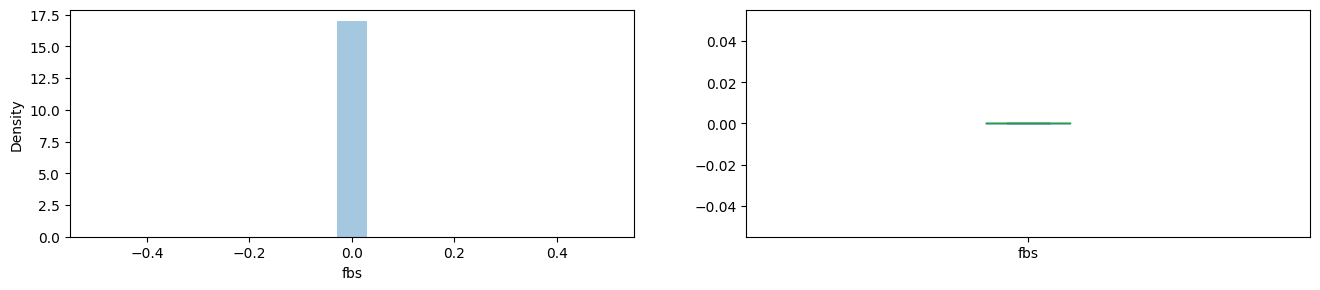

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


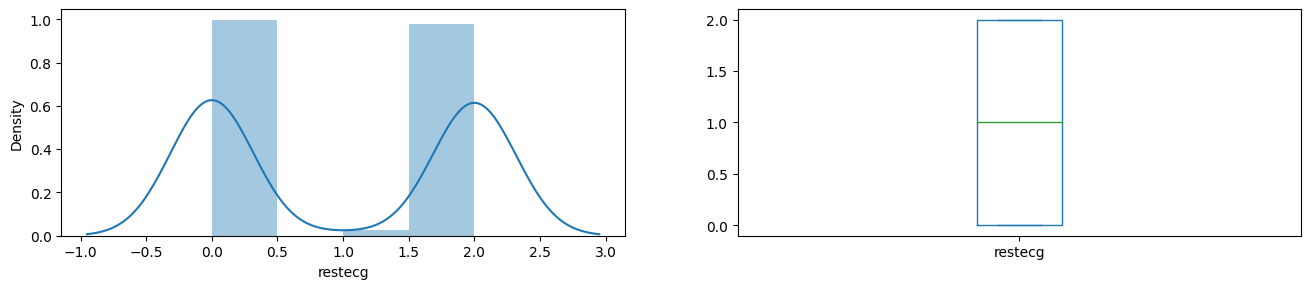

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


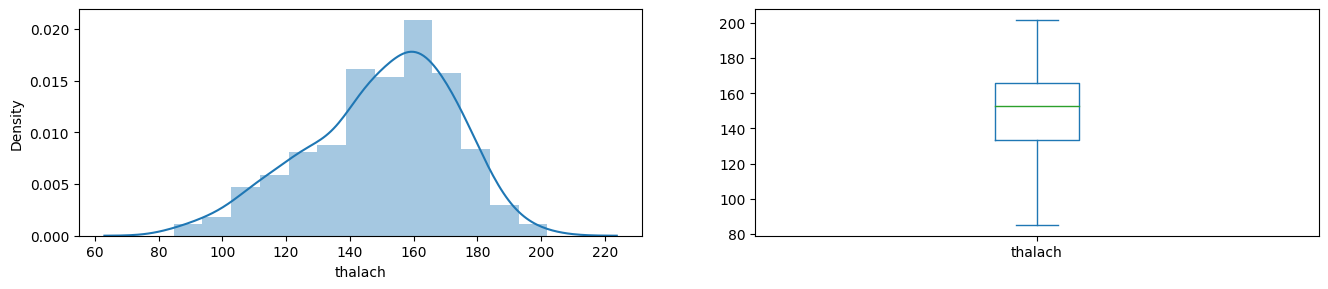

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


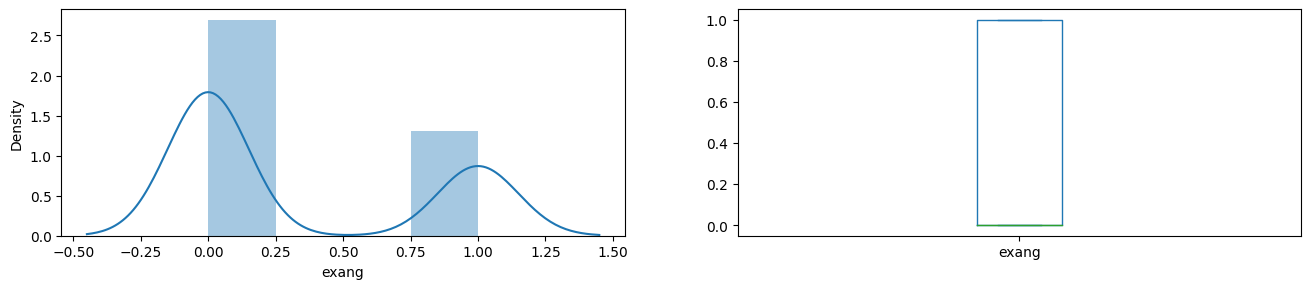

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


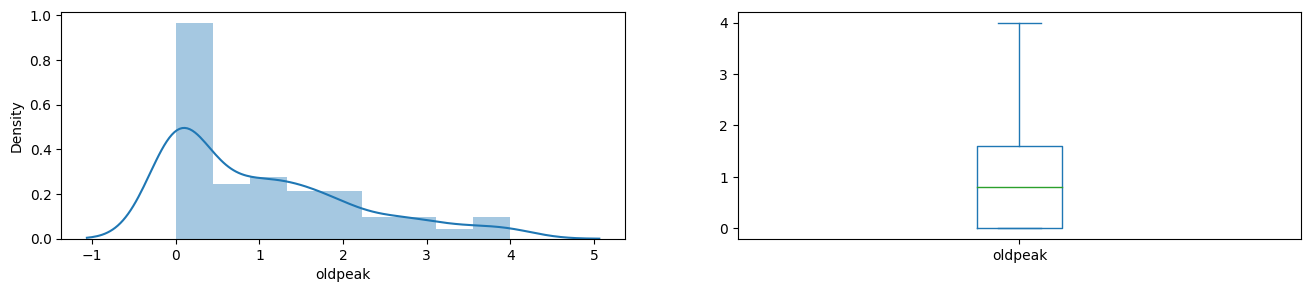

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


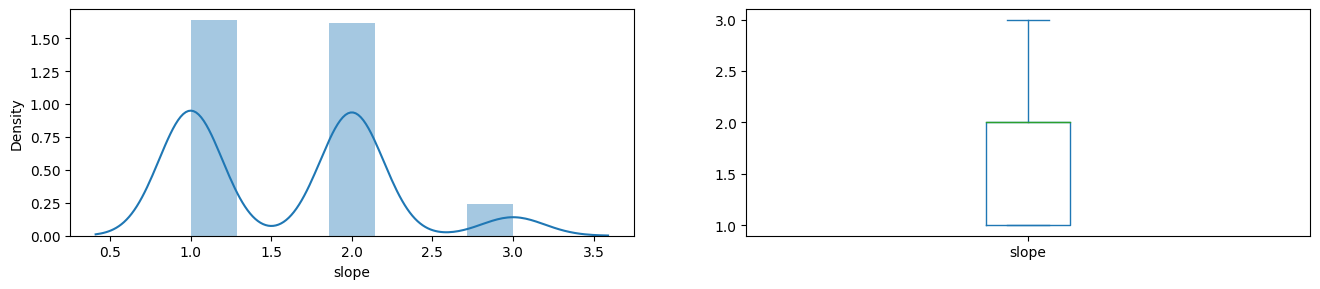

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


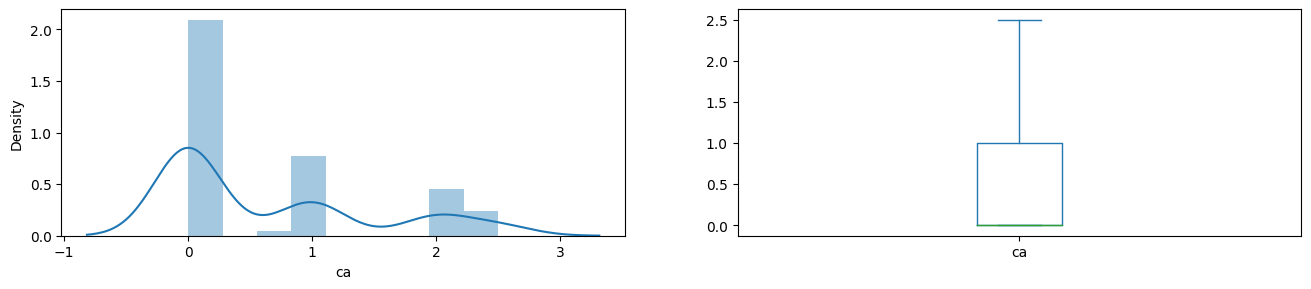

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


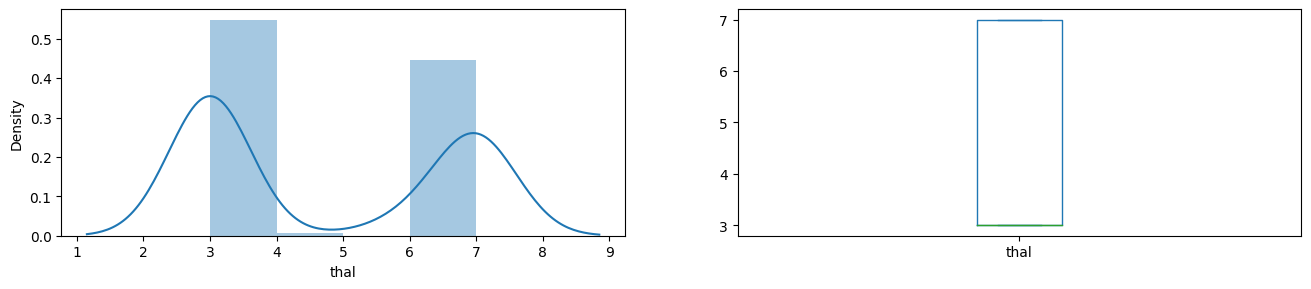

<ipython-input-333-2c06a1ae8929>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


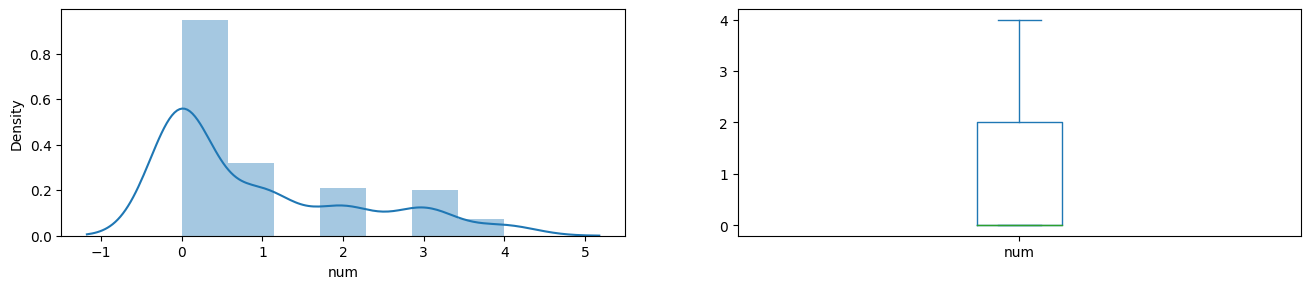

In [ ]:
data = df.copy()
for col in num_cols:
  replace_outliers(data, col)

#Distribution des variables quantitatives pour vérifier les outliers
for col in num_cols:
    plt.subplot(321)
    sns.distplot(data[col])

    plt.subplot(322)
    data[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

**DATA PREPARATION**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(y_sm.shape)

(454, 13)
(454, 1)


In [ ]:
# Proportion des modalités de la variable cible
y_sm.value_counts()

num
0      164
4      164
1       55
2       36
3       35
dtype: int64

In [ ]:
# Division de notre datasets en train et test (80/20)

from sklearn.model_selection import train_test_split

# Séparation des données en données de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [ ]:
print("Dimension de X_train:", X_train.shape)
print("Dimension de y_train:", y_train.shape)
print("Dimension de X_test:", X_test.shape)
print("Dimension de y_test:", y_test.shape)

Dimension de X_train: (363, 13)
Dimension de y_train: (363, 1)
Dimension de X_test: (91, 13)
Dimension de y_test: (91, 1)


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,60,1,4,130,206,0,2,132,1,2.400000,2,2.000000,7.0
17,54,1,4,140,239,0,0,160,0,1.200000,1,0.000000,3.0
66,60,1,3,140,185,0,2,155,0,3.000000,2,0.000000,3.0
371,53,1,4,156,262,0,2,126,0,1.907393,2,1.298639,7.0
253,51,0,3,120,295,0,2,157,0,0.600000,1,0.000000,3.0


In [ ]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
# Normalisation des variables Amount et Time
# Importations
from sklearn.preprocessing import StandardScaler
#Instanciation
standardScaler = StandardScaler()


In [ ]:
cols_scaled = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].columns.tolist()
cols_scaled

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
# Données d'entrainement
## Copie du dataframe précédent
X_trainScaled = X_train.copy()
#Standard scaler
X_trainScaled[cols_scaled] = standardScaler.fit_transform(X_train[cols_scaled])
## Apperçu
X_trainScaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,0.449530,0.680962,0.701862,-0.251302,-0.745958,-0.316228,0.880133,-0.583565,1.599632,0.766036,0.560865,0.922177,0.929266
17,-0.248315,0.680962,0.701862,0.339519,-0.113780,-0.316228,-1.249788,0.717742,-0.625144,-0.191503,-1.240851,-0.961873,-1.242894
66,0.449530,0.680962,-0.456211,0.339519,-1.148253,-0.316228,0.880133,0.485365,-0.625144,1.244806,0.560865,-0.961873,-1.242894
371,-0.364622,0.680962,0.701862,1.284833,0.326828,-0.316228,0.880133,-0.862417,-0.625144,0.372961,0.560865,0.261477,0.929266
253,-0.597237,-1.468510,-0.456211,-0.842124,0.959006,-0.316228,0.880133,0.578316,-0.625144,-0.670272,-1.240851,-0.961873,-1.242894


In [ ]:
# Données de test
# Copie du précédent dataframe
X_testScaled = X_test.copy()
# Standard Scaler
X_testScaled[cols_scaled] = standardScaler.transform(X_test[cols_scaled])
#Apperçu
X_testScaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,0.100608,-1.468510,-1.614284,-0.251302,-0.171251,-0.316228,0.880133,1.368395,-0.625144,-1.149041,0.560865,-0.019848,-1.242894
39,0.565837,0.680962,-0.456211,0.930340,-0.037153,3.162278,-1.249788,-0.351189,1.599632,-0.351092,0.560865,-0.961873,-1.242894
338,0.565837,0.680962,0.701862,0.221355,-1.512234,-0.316228,-0.184828,-0.908892,1.599632,1.642297,0.560865,-0.115802,-1.021639
410,-1.411389,0.680962,-2.772357,-1.019370,-0.286192,-0.316228,-1.249788,1.461345,-0.625144,1.556107,0.560865,-0.664865,0.929266
155,1.612604,0.680962,0.701862,-0.251302,1.476242,-0.316228,0.880133,-1.652496,-0.625144,0.766036,0.560865,1.864202,-1.242894


**MODÉLISATION**

In [ ]:
# Modélisation
### Entrainement standard

#Importation du f1-Score
from sklearn.metrics import f1_score
# Importation de la fonction time()
from time import time

In [ ]:
from time import time
from sklearn.metrics import f1_score
import pandas as pd

def modelisation(ModelsList, X_train_scaled, y_train, X_test_scaled, y_test, average=None):
    scores = []

    for mod in ModelsList:
        try:
            model = mod(random_state=42)  # Instanciation avec random_state
        except TypeError:
            model = mod()  # Instanciation sans random_state
        debut = time()  # Calcul du temps de début
        model.fit(X_train_scaled, y_train.to_numpy().ravel())  # Entraînement
  # Entraînement # Entraînement
        fin = time()  # Calcul du temps de fin
        y_pred_train = model.predict(X_train_scaled)  # Calcul des prédictions par rapport aux données d'entraînement
        y_pred_test = model.predict(X_test_scaled)  # Calcul des prédictions par rapport aux données de test
        scores.append({"Modeles": type(model).__name__,
                       "temps_apprentissage": fin - debut,
                       "f1_train_score": f1_score(y_train, y_pred_train, average=average),
                       "f1_test_score": f1_score(y_test, y_pred_test, average=average)})

    return pd.DataFrame(scores)


In [ ]:
# Importation des algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
# Liste des modèles
ModelsList = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
              DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC]


In [ ]:
# Première essaie de modélisation
scores = modelisation(ModelsList, X_trainScaled, y_train, X_testScaled, y_test, average='micro')




In [ ]:
scores.set_index("Modeles", inplace=True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.175246,1.000000,0.681319
AdaBoostClassifier,0.093526,0.727273,0.725275
GradientBoostingClassifier,0.746866,1.000000,0.681319
DecisionTreeClassifier,0.005028,1.000000,0.659341
KNeighborsClassifier,0.003177,0.801653,0.758242
LogisticRegression,0.014169,0.741047,0.703297
SVC,0.014185,0.851240,0.703297


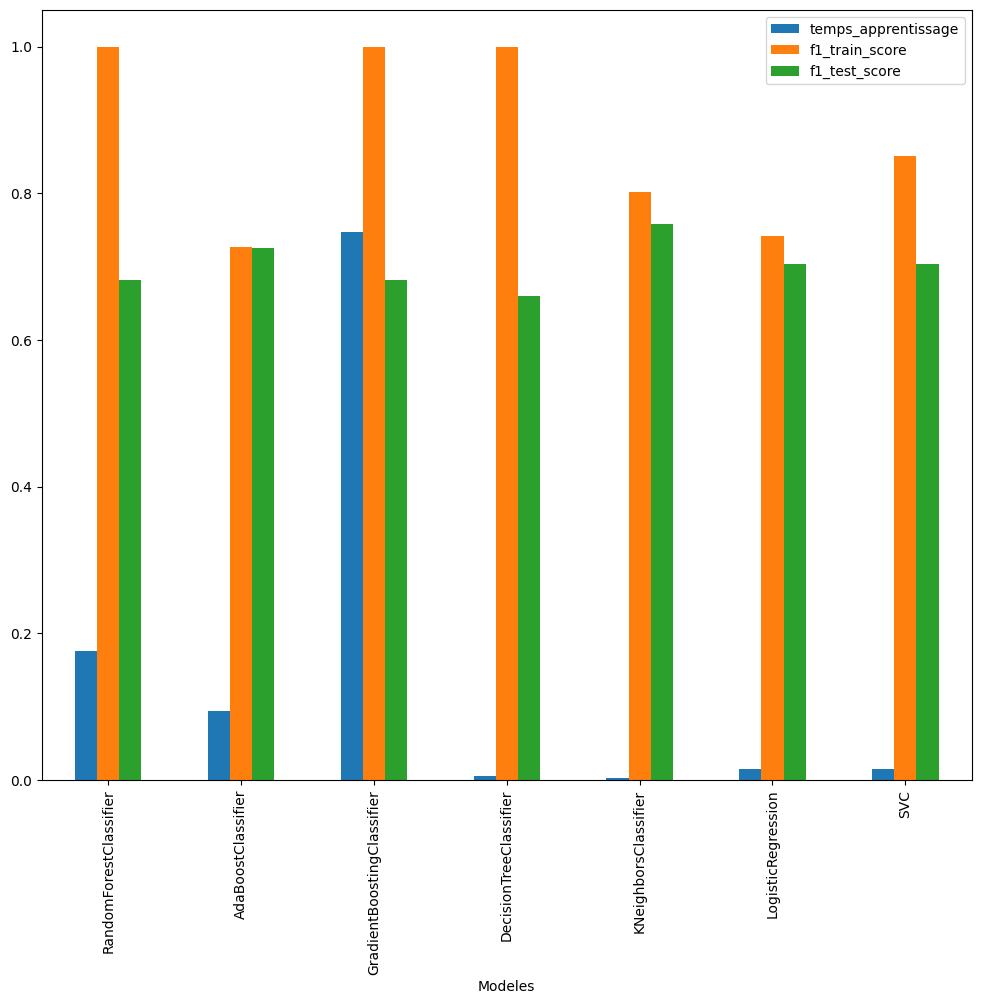

In [ ]:
# Visualisation
scores.plot.bar(figsize=(12,10))
plt.show()

In [ ]:
best_model = LogisticRegression()
best_model.fit(X_trainScaled, y_train.to_numpy().ravel())

pred_best = best_model.predict(X_testScaled)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcul de la précision
print("Précision:", precision_score(y_test, pred_best, average='micro') * 100)


# Calcul du recall
print("Recall:",recall_score(y_test, pred_best, average='micro')*100)

# Calcul du F1-Score
print("F1-Score:",f1_score(y_test, pred_best, average='micro')*100)

Précision: 70.32967032967034
Recall: 70.32967032967034
F1-Score: 70.32967032967034
